# E2E_Regression_Pipeline_Song_Year_Prediction

Setup dan Import Libraries

In [ ]:
!pip install -q gdown scikit-learn pandas numpy matplotlib seaborn lightgbm xgboost tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import lightgbm as lgb
import xgboost as xgb

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks

np.random.seed(42)
tf.random.set_seed(42)

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


Download dan Load Dataset

In [ ]:
import gdown

file_id = "1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9"
url = f"https://drive.google.com/uc?id={file_id}"
output = "midterm-regresi-dataset.csv"

print("Downloading dataset...")
gdown.download(url, output, quiet=False)

df = pd.read_csv(output, header=None)
print(f"\n✓ Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")

df.columns = ['year'] + [f'feature_{i}' for i in range(1, df.shape[1])]
print(f"✓ Column names assigned")

Downloading...
From (original): https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9
From (redirected): https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9&confirm=t&uuid=dd3a8cf7-a0f2-4f97-a064-ac10a32e63b5
To: /content/midterm-regresi-dataset.csv
100%|██████████| 443M/443M [00:07<00:00, 56.5MB/s]



✓ Dataset loaded: 515345 rows, 91 columns
✓ Column names assigned


Data Exploration

In [ ]:
print("\n" + "="*60)
print("DATA EXPLORATION")
print("="*60)

print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(f"Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\nBasic Statistics:")
print(df.describe())

missing = df.isnull().sum().sum()
print(f"\nMissing Values: {missing}")
if missing == 0:
    print("✓ No missing values found!")

y = df['year']
print(f"\nTarget Variable (Year) Statistics:")
print(f"  Min: {y.min():.0f}")
print(f"  Max: {y.max():.0f}")
print(f"  Mean: {y.mean():.2f}")
print(f"  Median: {y.median():.2f}")
print(f"  Std: {y.std():.2f}")
print(f"  Range: {y.max() - y.min():.0f} years")


DATA EXPLORATION

First 5 rows:
   year  feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0  2001   49.94357   21.47114   73.07750    8.74861  -17.40628  -13.09905   
1  2001   48.73215   18.42930   70.32679   12.94636  -10.32437  -24.83777   
2  2001   50.95714   31.85602   55.81851   13.41693   -6.57898  -18.54940   
3  2001   48.24750   -1.89837   36.29772    2.58776    0.97170  -26.21683   
4  2001   50.97020   42.20998   67.09964    8.46791  -15.85279  -16.81409   

   feature_7  feature_8  feature_9  ...  feature_81  feature_82  feature_83  \
0  -25.01202  -12.23257    7.83089  ...    13.01620   -54.40548    58.99367   
1    8.76630   -0.92019   18.76548  ...     5.66812   -19.68073    33.04964   
2   -3.27872   -2.35035   16.07017  ...     3.03800    26.05866   -50.92779   
3    5.05097  -10.34124    3.55005  ...    34.57337  -171.70734   -16.96705   
4  -12.48207   -9.37636   12.63699  ...     9.92661   -55.95724    64.92712   

   feature_84  feature_85  fe

Data Visualization


DATA VISUALIZATION


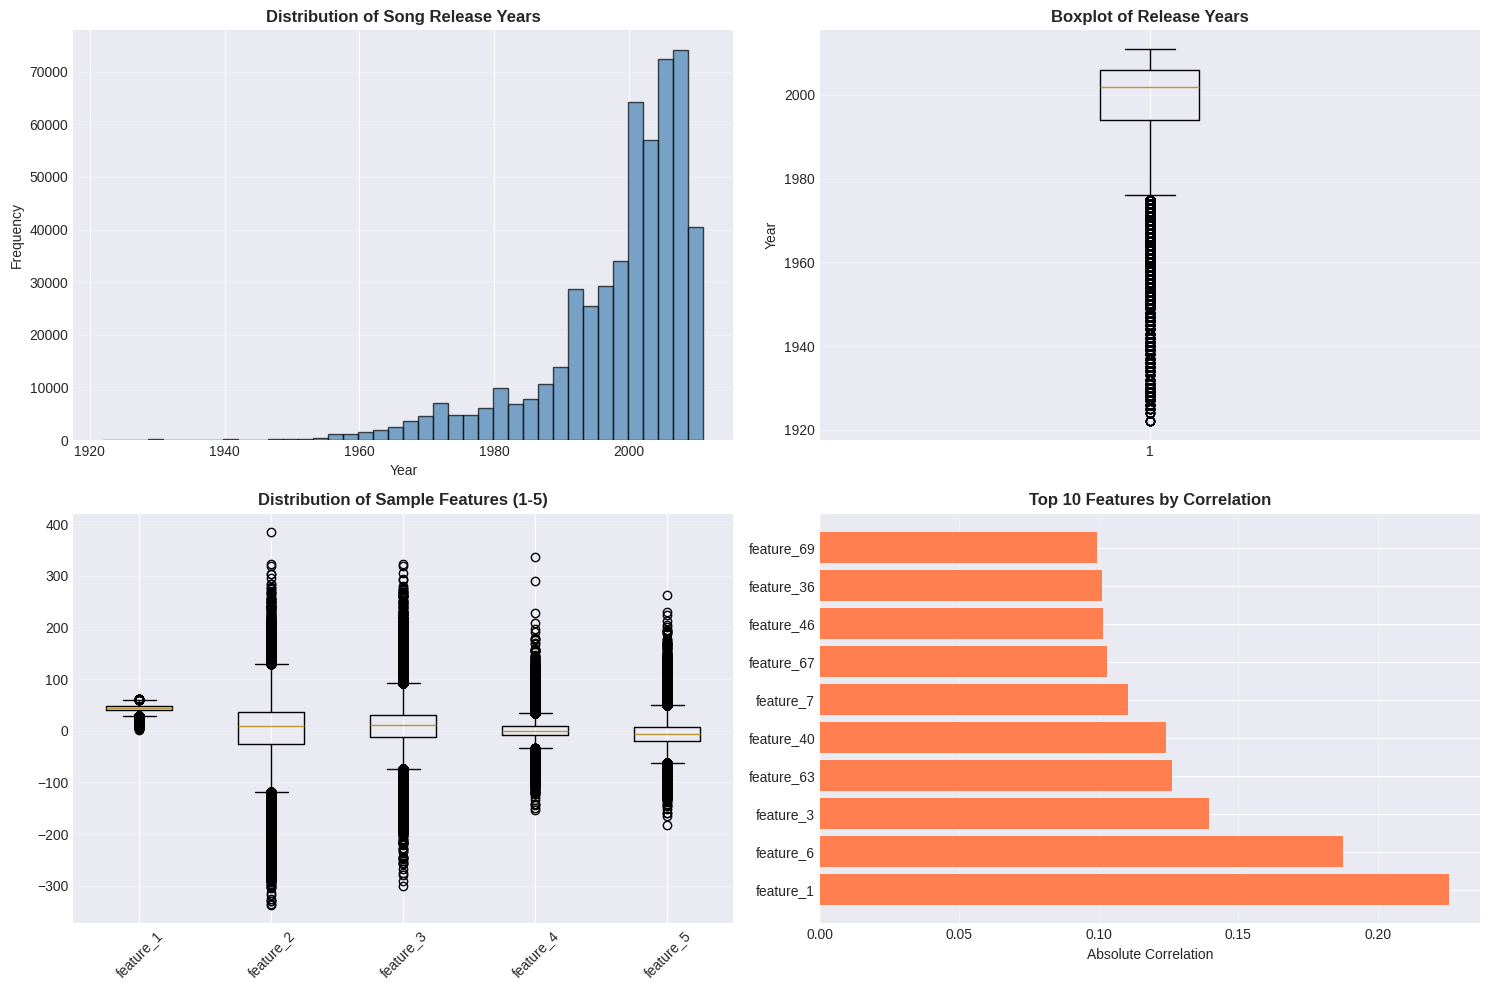


✓ Visualizations generated successfully!


In [ ]:
print("\n" + "="*60)
print("DATA VISUALIZATION")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].hist(df['year'], bins=40, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Song Release Years', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(axis='y', alpha=0.3)

axes[0, 1].boxplot(df['year'], vert=True)
axes[0, 1].set_title('Boxplot of Release Years', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Year')
axes[0, 1].grid(axis='y', alpha=0.3)

sample_features = df.iloc[:, 1:6]
axes[1, 0].boxplot(sample_features.values, labels=sample_features.columns)
axes[1, 0].set_title('Distribution of Sample Features (1-5)', fontsize=12, fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

correlations = df.iloc[:, 1:].corrwith(df['year']).abs().sort_values(ascending=False)[:10]
axes[1, 1].barh(range(len(correlations)), correlations.values, color='coral')
axes[1, 1].set_yticks(range(len(correlations)))
axes[1, 1].set_yticklabels(correlations.index)
axes[1, 1].set_title('Top 10 Features by Correlation', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Absolute Correlation')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Visualizations generated successfully!")

Outlier Detection dan Handling

In [ ]:
print("\n" + "="*60)
print("OUTLIER DETECTION AND HANDLING")
print("="*60)

def detect_outliers_iqr(data, column, threshold=1.5):
    """Detect outliers using IQR method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - threshold * IQR
    upper = Q3 + threshold * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers, lower, upper

outliers_y, lower_y, upper_y = detect_outliers_iqr(df, 'year')
print(f"\nOutliers in target (year): {len(outliers_y)} ({len(outliers_y)/len(df)*100:.2f}%)")
print(f"Bounds: [{lower_y:.0f}, {upper_y:.0f}]")

df_cleaned = df.copy()
feature_cols = df.columns[1:]

outlier_count = 0
for col in feature_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_count += ((df_cleaned[col] < lower) | (df_cleaned[col] > upper)).sum()

    df_cleaned[col] = df_cleaned[col].clip(lower=lower, upper=upper)

print(f"\nTotal outliers capped in features: {outlier_count}")
print(f"✓ Outliers handled using capping method")
print(f"  Dataset shape: {df_cleaned.shape}")


OUTLIER DETECTION AND HANDLING

Outliers in target (year): 29703 (5.76%)
Bounds: [1976, 2024]

Total outliers capped in features: 2726624
✓ Outliers handled using capping method
  Dataset shape: (515345, 91)


Feature Engineering dan Selection

In [ ]:
print("\n" + "="*60)
print("FEATURE ENGINEERING AND SELECTION")
print("="*60)

X = df_cleaned.iloc[:, 1:]
y = df_cleaned['year']

print(f"\nOriginal features: {X.shape[1]}")

k_best = min(50, X.shape[1])
selector = SelectKBest(f_regression, k=k_best)
X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()].tolist()
print(f"Selected features: {len(selected_features)}")

feature_scores = pd.DataFrame({
    'feature': X.columns,
    'score': selector.scores_
}).sort_values('score', ascending=False)

print(f"\nTop 10 Features by F-score:")
print(feature_scores.head(10).to_string(index=False))

X_final = pd.DataFrame(X_selected, columns=selected_features)
print(f"\n✓ Feature selection completed")


FEATURE ENGINEERING AND SELECTION

Original features: 90
Selected features: 50

Top 10 Features by F-score:
   feature        score
 feature_1 29412.667917
 feature_6 19793.541484
 feature_3 10765.817355
feature_63 10664.444925
feature_40  9803.238387
feature_57  7097.980254
feature_46  7005.686599
feature_69  6907.147680
feature_36  6710.282981
feature_47  6707.917484

✓ Feature selection completed


Train-Test Split dan Scaling

In [ ]:
print("\n" + "="*60)
print("DATA SPLITTING AND SCALING")
print("="*60)

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Train year range: [{y_train.min():.0f}, {y_train.max():.0f}]")
print(f"Test year range: [{y_test.min():.0f}, {y_test.max():.0f}]")

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✓ Data split and scaled successfully")
print(f"  Scaled features shape: {X_train_scaled.shape}")


DATA SPLITTING AND SCALING

Training set: 412276 samples
Test set: 103069 samples
Train year range: [1922, 2011]
Test year range: [1924, 2010]

✓ Data split and scaled successfully
  Scaled features shape: (412276, 50)


Model Training - Machine Learning Models

In [ ]:
print("\n" + "="*60)
print("MACHINE LEARNING MODELS TRAINING")
print("="*60)

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    """Train and evaluate a regression model"""
    print(f"\n{'='*70}")
    print(f"Training {model_name}...")
    print(f"{'='*70}")

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='r2', n_jobs=-1)

    print(f"\n{model_name} Results:")
    print(f"  Train RMSE: {train_rmse:.4f} | Test RMSE: {test_rmse:.4f}")
    print(f"  Train MAE:  {train_mae:.4f} | Test MAE:  {test_mae:.4f}")
    print(f"  Train R²:   {train_r2:.4f} | Test R²:   {test_r2:.4f}")
    print(f"  CV R² Mean: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

    return {
        'model': model,
        'model_name': model_name,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'cv_r2_mean': cv_scores.mean(),
        'cv_r2_std': cv_scores.std(),
        'y_train_pred': y_train_pred,
        'y_test_pred': y_test_pred
    }

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Lasso Regression': Lasso(alpha=0.1, random_state=42, max_iter=10000),
    'Random Forest': RandomForestRegressor(
        n_estimators=50,
        max_depth=10,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42,
        n_jobs=-1
    ),
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=50,
        max_depth=5,
        learning_rate=0.1,
        random_state=42
    ),
    'XGBoost': xgb.XGBRegressor(
        n_estimators=50,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        n_jobs=-1,
        tree_method='hist'
    ),
    'LightGBM': lgb.LGBMRegressor(
        n_estimators=50,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        n_jobs=-1,
        verbose=-1
    )
}

ml_results = []
for name, model in models.items():
    result = evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test, name)
    ml_results.append(result)

print("\n✓ All ML models trained successfully!")


MACHINE LEARNING MODELS TRAINING

Training Linear Regression...

Linear Regression Results:
  Train RMSE: 9.7679 | Test RMSE: 9.7383
  Train MAE:  7.0936 | Test MAE:  7.0691
  Train R²:   0.2023 | Test R²:   0.2032
  CV R² Mean: 0.2020 (±0.0013)

Training Ridge Regression...

Ridge Regression Results:
  Train RMSE: 9.7679 | Test RMSE: 9.7383
  Train MAE:  7.0936 | Test MAE:  7.0691
  Train R²:   0.2023 | Test R²:   0.2032
  CV R² Mean: 0.2020 (±0.0013)

Training Lasso Regression...

Lasso Regression Results:
  Train RMSE: 9.8079 | Test RMSE: 9.7757
  Train MAE:  7.1183 | Test MAE:  7.0919
  Train R²:   0.1957 | Test R²:   0.1970
  CV R² Mean: 0.1955 (±0.0007)

Training Random Forest...

Random Forest Results:
  Train RMSE: 9.2735 | Test RMSE: 9.5157
  Train MAE:  6.6088 | Test MAE:  6.7715
  Train R²:   0.2810 | Test R²:   0.2392
  CV R² Mean: 0.2417 (±0.0007)

Training Gradient Boosting...

Gradient Boosting Results:
  Train RMSE: 9.3815 | Test RMSE: 9.4276
  Train MAE:  6.6989 | Tes

Deep Learning Model

In [ ]:
print("\n" + "="*60)
print("DEEP LEARNING MODEL TRAINING")
print("="*60)

def build_nn(input_dim):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(input_dim,)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),

        layers.Dense(1)
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae', keras.metrics.RootMeanSquaredError(name='rmse')]
    )

    return model

nn_model = build_nn(X_train_scaled.shape[1])
print("\nNeural Network Architecture:")
nn_model.summary()

early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1
)

print("\nTraining Neural Network...")
history = nn_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

y_train_pred_nn = nn_model.predict(X_train_scaled, verbose=0).flatten()
y_test_pred_nn = nn_model.predict(X_test_scaled, verbose=0).flatten()

train_rmse_nn = np.sqrt(mean_squared_error(y_train, y_train_pred_nn))
test_rmse_nn = np.sqrt(mean_squared_error(y_test, y_test_pred_nn))
train_mae_nn = mean_absolute_error(y_train, y_train_pred_nn)
test_mae_nn = mean_absolute_error(y_test, y_test_pred_nn)
train_r2_nn = r2_score(y_train, y_train_pred_nn)
test_r2_nn = r2_score(y_test, y_test_pred_nn)

print(f"\nNeural Network Results:")
print(f"  Train RMSE: {train_rmse_nn:.4f} | Test RMSE: {test_rmse_nn:.4f}")
print(f"  Train MAE:  {train_mae_nn:.4f} | Test MAE:  {test_mae_nn:.4f}")
print(f"  Train R²:   {train_r2_nn:.4f} | Test R²:   {test_r2_nn:.4f}")

nn_results = {
    'model': nn_model,
    'model_name': 'Neural Network',
    'train_rmse': train_rmse_nn,
    'test_rmse': test_rmse_nn,
    'train_mae': train_mae_nn,
    'test_mae': test_mae_nn,
    'train_r2': train_r2_nn,
    'test_r2': test_r2_nn,
    'cv_r2_mean': test_r2_nn,
    'cv_r2_std': 0.0,
    'y_train_pred': y_train_pred_nn,
    'y_test_pred': y_test_pred_nn
}

print("\n✓ Neural Network trained successfully!")


DEEP LEARNING MODEL TRAINING

Neural Network Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         6,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,665 (69.00 KB)

 Trainable params: 17,281 (67.50 KB)

 Non-trainable params: 384 (1.50 KB)


Training Neural Network...
Epoch 1/100
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - loss: 1022849.9375 - mae: 718.5394 - rmse: 938.1375 - val_loss: 1856.2135 - val_mae: 34.4191 - val_rmse: 43.0838 - learning_rate: 0.0010
Epoch 2/100
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - loss: 78225.9688 - mae: 223.8097 - rmse: 279.6785 - val_loss: 1618.4575 - val_mae: 37.2824 - val_rmse: 40.2301 - learning_rate: 0.0010
Epoch 3/100
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - loss: 71708.4062 - mae: 214.2575 - rmse: 267.7760 - val_loss: 1836.1006 - val_mae: 40.9263 - val_rmse: 42.8497 - learning_rate: 0.0010
Epoch 4/100
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - loss: 64100.0742 - mae: 202.2931 - rmse: 253.1689 - val_loss: 590.1201 - val_mae: 21.0621 - val_rmse: 24.2924 - learning_rate: 0.0010
Epoch 5/100
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - loss: 56582.6758 - mae: 190.1458 - rmse: 237.8642 - val_loss: 1093.3496 - val_mae: 30.8049 - val_rmse: 33.0658 - learning_rate: 0.0010
Epoch 

Training History Visualization (Deep Learning)


NEURAL NETWORK TRAINING HISTORY


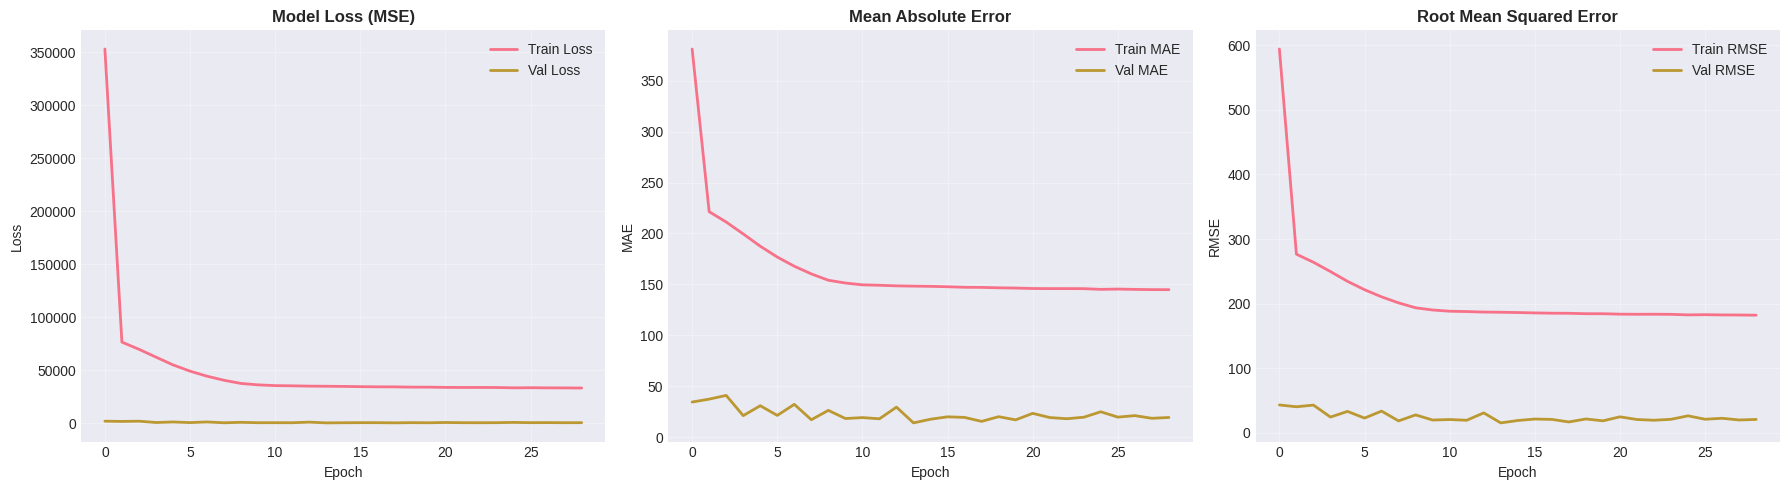


✓ Training history visualized!


In [ ]:
print("\n" + "="*60)
print("NEURAL NETWORK TRAINING HISTORY")
print("="*60)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].plot(history.history['loss'], label='Train Loss', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Val Loss', linewidth=2)
axes[0].set_title('Model Loss (MSE)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(history.history['mae'], label='Train MAE', linewidth=2)
axes[1].plot(history.history['val_mae'], label='Val MAE', linewidth=2)
axes[1].set_title('Mean Absolute Error', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

axes[2].plot(history.history['rmse'], label='Train RMSE', linewidth=2)
axes[2].plot(history.history['val_rmse'], label='Val RMSE', linewidth=2)
axes[2].set_title('Root Mean Squared Error', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('RMSE')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Training history visualized!")

Model Comparison

In [ ]:
print("\n" + "="*60)
print("MODEL COMPARISON")
print("="*60)

all_results = ml_results + [nn_results]

comparison_df = pd.DataFrame([
    {
        'Model': r['model_name'],
        'Train RMSE': r['train_rmse'],
        'Test RMSE': r['test_rmse'],
        'Train MAE': r['train_mae'],
        'Test MAE': r['test_mae'],
        'Train R²': r['train_r2'],
        'Test R²': r['test_r2'],
        'CV R² Mean': r['cv_r2_mean'],
        'CV R² Std': r['cv_r2_std']
    }
    for r in all_results
])

print("\nModel Performance Summary:")
print(comparison_df.to_string(index=False))

best_idx = comparison_df['Test R²'].idxmax()
best_model_name = comparison_df.loc[best_idx, 'Model']
best_test_r2 = comparison_df.loc[best_idx, 'Test R²']
best_test_rmse = comparison_df.loc[best_idx, 'Test RMSE']
best_test_mae = comparison_df.loc[best_idx, 'Test MAE']

print("\n" + "="*60)
print(f"🏆 BEST MODEL: {best_model_name}")
print("="*60)
print(f"  Test R²:   {best_test_r2:.4f}")
print(f"  Test RMSE: {best_test_rmse:.4f} years")
print(f"  Test MAE:  {best_test_mae:.4f} years")
print(f"\n  Interpretation: On average, predictions are off by ~{best_test_mae:.1f} years")


MODEL COMPARISON

Model Performance Summary:
            Model  Train RMSE  Test RMSE  Train MAE  Test MAE  Train R²   Test R²  CV R² Mean  CV R² Std
Linear Regression    9.767935   9.738282   7.093571  7.069114  0.202272  0.203175    0.201999   0.001329
 Ridge Regression    9.767935   9.738282   7.093571  7.069114  0.202272  0.203175    0.201999   0.001329
 Lasso Regression    9.807939   9.775750   7.118292  7.091948  0.195725  0.197032    0.195539   0.000703
    Random Forest    9.273463   9.515676   6.608798  6.771531  0.280993  0.239188    0.241671   0.000659
Gradient Boosting    9.381473   9.427594   6.698930  6.722560  0.264147  0.253207    0.253649   0.000684
          XGBoost    9.281240   9.376018   6.618229  6.672863  0.279787  0.261356    0.263662   0.001090
         LightGBM    9.347478   9.400767   6.668905  6.696464  0.269470  0.257452    0.259329   0.000543
   Neural Network   15.275711  15.277210  13.936865 13.942109 -0.950976 -0.961040   -0.961040   0.000000

🏆 BEST M

Model Comparison Visualization


MODEL COMPARISON VISUALIZATION


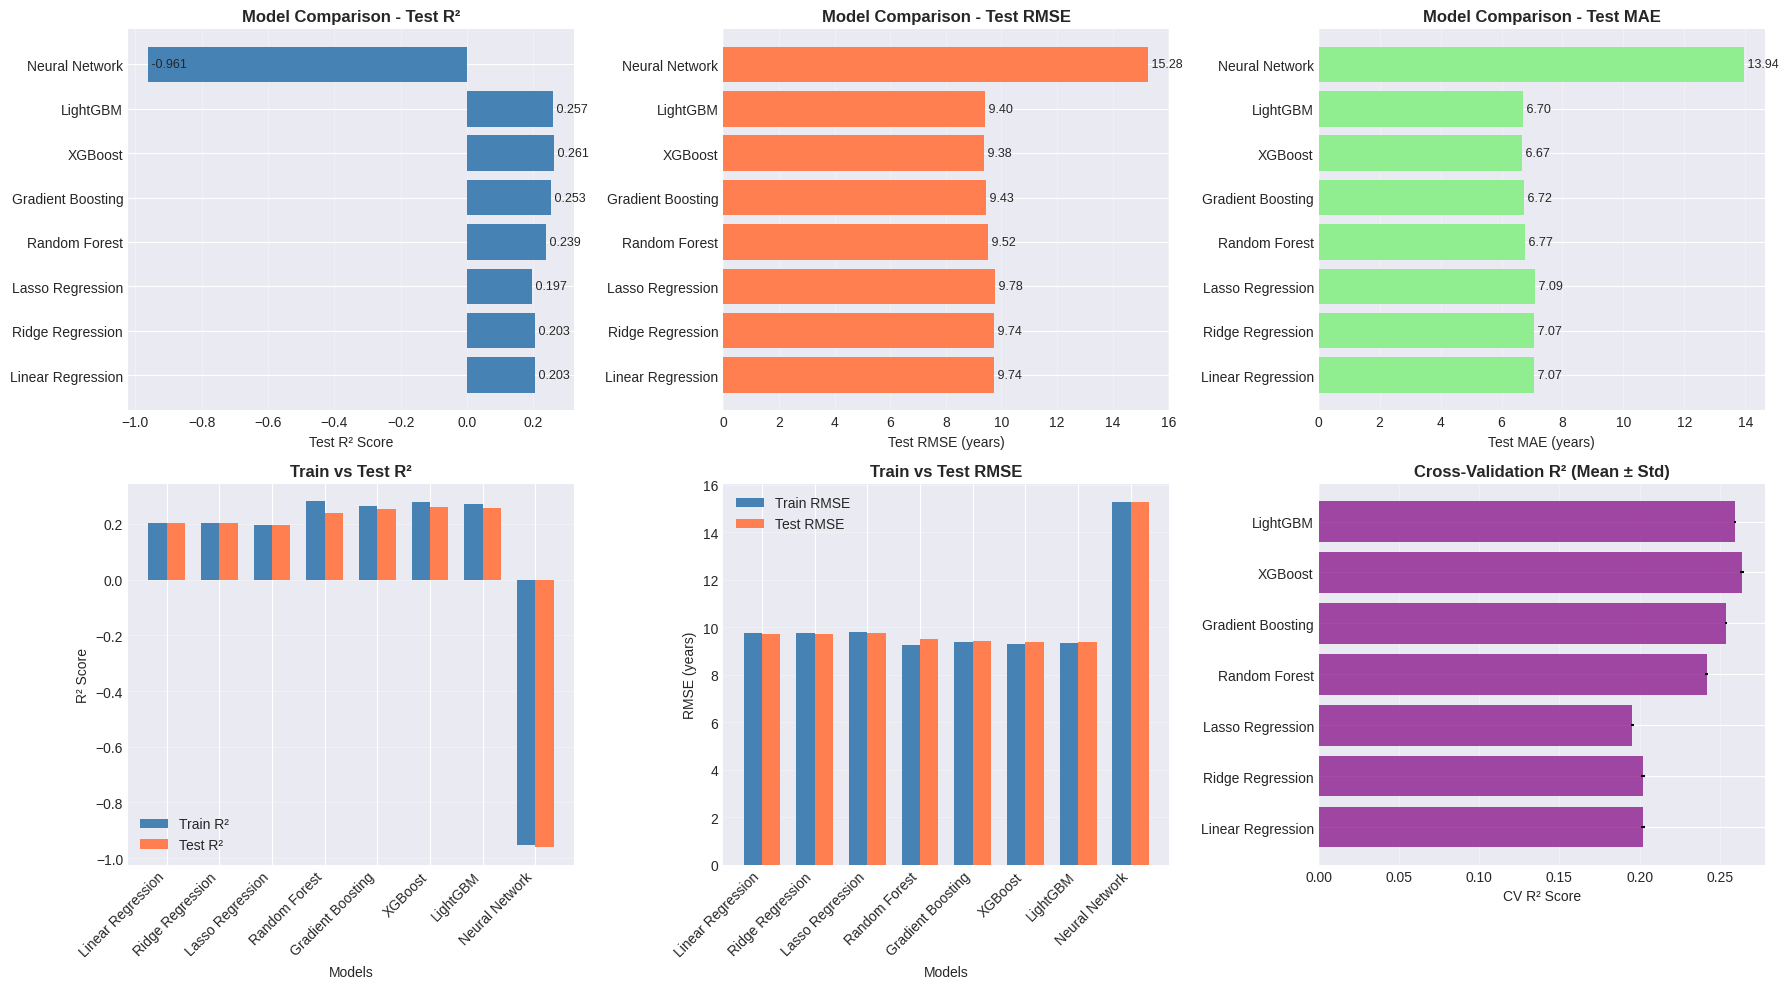


✓ Model comparison visualized!


In [ ]:
print("\n" + "="*60)
print("MODEL COMPARISON VISUALIZATION")
print("="*60)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

axes[0, 0].barh(comparison_df['Model'], comparison_df['Test R²'], color='steelblue')
axes[0, 0].set_xlabel('Test R² Score')
axes[0, 0].set_title('Model Comparison - Test R²', fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)
for i, v in enumerate(comparison_df['Test R²']):
    axes[0, 0].text(v, i, f' {v:.3f}', va='center', fontsize=9)

axes[0, 1].barh(comparison_df['Model'], comparison_df['Test RMSE'], color='coral')
axes[0, 1].set_xlabel('Test RMSE (years)')
axes[0, 1].set_title('Model Comparison - Test RMSE', fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)
for i, v in enumerate(comparison_df['Test RMSE']):
    axes[0, 1].text(v, i, f' {v:.2f}', va='center', fontsize=9)

axes[0, 2].barh(comparison_df['Model'], comparison_df['Test MAE'], color='lightgreen')
axes[0, 2].set_xlabel('Test MAE (years)')
axes[0, 2].set_title('Model Comparison - Test MAE', fontweight='bold')
axes[0, 2].grid(axis='x', alpha=0.3)
for i, v in enumerate(comparison_df['Test MAE']):
    axes[0, 2].text(v, i, f' {v:.2f}', va='center', fontsize=9)

x = np.arange(len(comparison_df))
width = 0.35
axes[1, 0].bar(x - width/2, comparison_df['Train R²'], width, label='Train R²', color='steelblue')
axes[1, 0].bar(x + width/2, comparison_df['Test R²'], width, label='Test R²', color='coral')
axes[1, 0].set_xlabel('Models')
axes[1, 0].set_ylabel('R² Score')
axes[1, 0].set_title('Train vs Test R²', fontweight='bold')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

axes[1, 1].bar(x - width/2, comparison_df['Train RMSE'], width, label='Train RMSE', color='steelblue')
axes[1, 1].bar(x + width/2, comparison_df['Test RMSE'], width, label='Test RMSE', color='coral')
axes[1, 1].set_xlabel('Models')
axes[1, 1].set_ylabel('RMSE (years)')
axes[1, 1].set_title('Train vs Test RMSE', fontweight='bold')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

valid_cv = comparison_df[comparison_df['CV R² Std'] > 0]
axes[1, 2].barh(valid_cv['Model'], valid_cv['CV R² Mean'],
                xerr=valid_cv['CV R² Std'], color='purple', alpha=0.7)
axes[1, 2].set_xlabel('CV R² Score')
axes[1, 2].set_title('Cross-Validation R² (Mean ± Std)', fontweight='bold')
axes[1, 2].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Model comparison visualized!")

Hyperparameter Tuning for Best Model

In [ ]:
print("\n" + "="*60)
print("HYPERPARAMETER TUNING FOR BEST MODEL")
print("="*60)

best_result = all_results[best_idx]
best_base_model = best_result['model']

param_grids = {
    'Linear Regression': {},
    'Ridge Regression': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso Regression': {'alpha': [0.01, 0.1, 1.0]},
    'Random Forest': {
        'n_estimators': [50, 100],
        'max_depth': [10, 15],
        'min_samples_split': [5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100],
        'max_depth': [3, 5],
        'learning_rate': [0.05, 0.1]
    },
    'XGBoost': {
        'n_estimators': [50, 100],
        'max_depth': [6, 8],
        'learning_rate': [0.05, 0.1]
    },
    'LightGBM': {
        'n_estimators': [50, 100],
        'max_depth': [6, 8],
        'learning_rate': [0.05, 0.1]
    },
    'Neural Network': {}
}

param_grid = param_grids.get(best_model_name, {})

if param_grid and best_model_name != 'Neural Network':
    print(f"\nTuning {best_model_name}...")
    print(f"Parameter grid: {param_grid}")

    grid_search = GridSearchCV(
        best_base_model,
        param_grid,
        cv=3,
        scoring='r2',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train_scaled, y_train)

    print(f"\n✓ Best parameters: {grid_search.best_params_}")
    print(f"✓ Best CV R² score: {grid_search.best_score_:.4f}")

    tuned_model = grid_search.best_estimator_
    y_pred_tuned = tuned_model.predict(X_test_scaled)

    tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
    tuned_mae = mean_absolute_error(y_test, y_pred_tuned)
    tuned_r2 = r2_score(y_test, y_pred_tuned)

    print("\nTuned Model Performance:")
    print(f"  Test RMSE: {tuned_rmse:.4f} years")
    print(f"  Test MAE:  {tuned_mae:.4f} years")
    print(f"  Test R²:   {tuned_r2:.4f}")

    y_test_pred_best = y_pred_tuned
    best_model_final = tuned_model

else:
    print(f"\n{best_model_name} already optimized or no tuning needed.")
    y_test_pred_best = best_result['y_test_pred']
    best_model_final = best_result['model']
    tuned_rmse = best_test_rmse
    tuned_mae = best_test_mae
    tuned_r2 = best_test_r2


HYPERPARAMETER TUNING FOR BEST MODEL

Tuning XGBoost...
Parameter grid: {'n_estimators': [50, 100], 'max_depth': [6, 8], 'learning_rate': [0.05, 0.1]}
Fitting 3 folds for each of 8 candidates, totalling 24 fits

✓ Best parameters: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100}
✓ Best CV R² score: 0.2924

Tuned Model Performance:
  Test RMSE: 9.1670 years
  Test MAE:  6.4990 years
  Test R²:   0.2939


 Prediction Analysis - Best Model


PREDICTION ANALYSIS - BEST MODEL


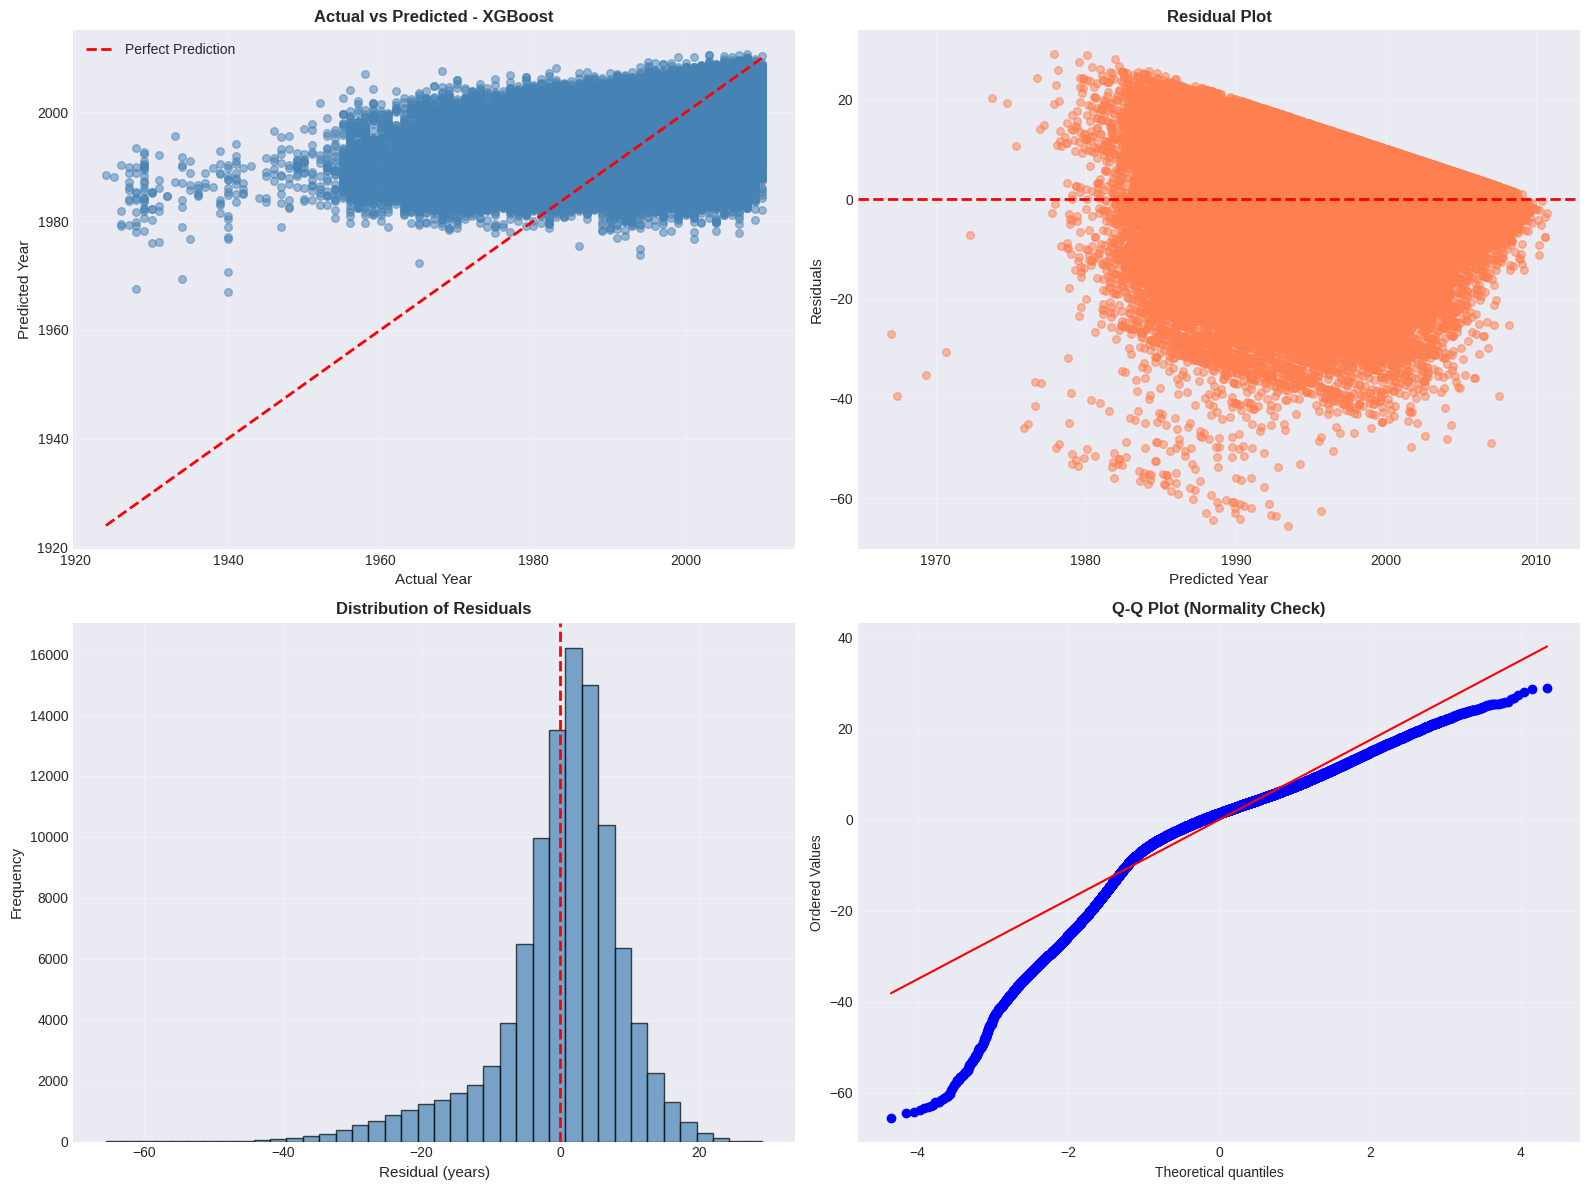


Residual Analysis:
  Mean Residual:   0.0369 years
  Std Residual:    9.1669 years
  Min Residual:    -65.4979 years
  Max Residual:    29.1122 years
  Median Residual: 1.4542 years

✓ Prediction analysis completed!


In [ ]:
print("\n" + "="*60)
print("PREDICTION ANALYSIS - BEST MODEL")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

axes[0, 0].scatter(y_test, y_test_pred_best, alpha=0.5, s=30, color='steelblue')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Year', fontsize=11)
axes[0, 0].set_ylabel('Predicted Year', fontsize=11)
axes[0, 0].set_title(f'Actual vs Predicted - {best_model_name}', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

residuals = y_test - y_test_pred_best
axes[0, 1].scatter(y_test_pred_best, residuals, alpha=0.5, s=30, color='coral')
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Year', fontsize=11)
axes[0, 1].set_ylabel('Residuals', fontsize=11)
axes[0, 1].set_title('Residual Plot', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].hist(residuals, bins=40, color='steelblue', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 0].set_xlabel('Residual (years)', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title('Distribution of Residuals', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Normality Check)', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nResidual Analysis:")
print(f"  Mean Residual:   {residuals.mean():.4f} years")
print(f"  Std Residual:    {residuals.std():.4f} years")
print(f"  Min Residual:    {residuals.min():.4f} years")
print(f"  Max Residual:    {residuals.max():.4f} years")
print(f"  Median Residual: {np.median(residuals):.4f} years")

print("\n✓ Prediction analysis completed!")

Feature Importance Analysis


FEATURE IMPORTANCE ANALYSIS

Top 20 Most Important Features (XGBoost):
   feature  importance
 feature_1    0.111169
feature_14    0.079743
 feature_3    0.071315
feature_57    0.038450
feature_20    0.036503
 feature_6    0.032684
feature_41    0.029798
feature_39    0.026832
feature_36    0.026658
feature_63    0.025102
feature_73    0.021406
feature_40    0.020447
feature_88    0.019132
feature_38    0.018529
feature_47    0.018097
feature_78    0.017497
feature_90    0.017086
feature_74    0.016717
feature_85    0.016711
feature_46    0.016449


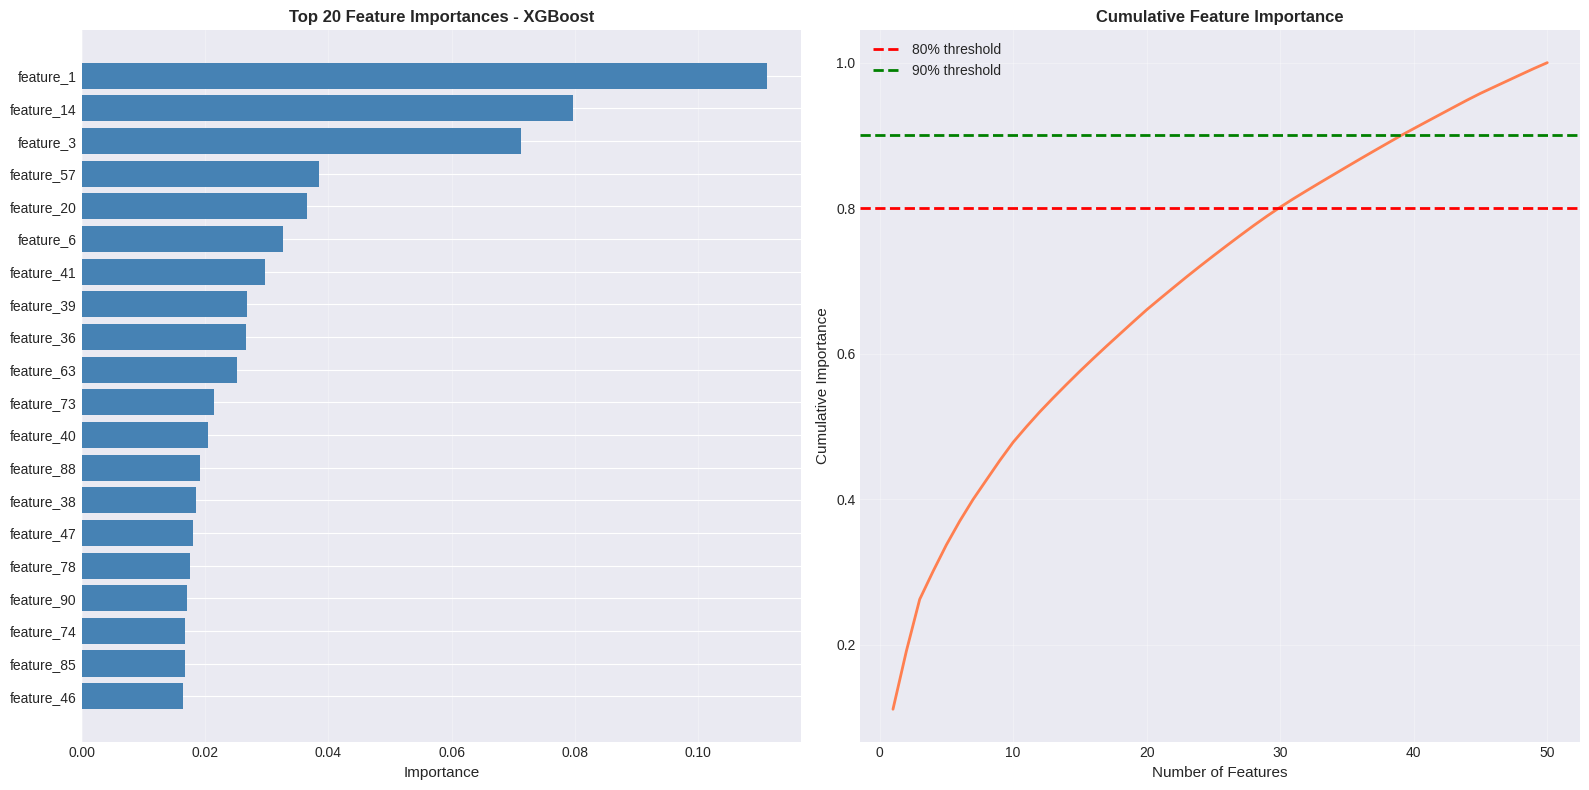


Feature Importance Insights:
  Top feature: feature_1 (importance: 0.1112)
  Features needed for 80% importance: 45
  Features needed for 90% importance: 12

✓ Feature importance analysis completed!


In [ ]:
print("\n" + "="*60)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*60)

tree_based_models = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM']

if best_model_name in tree_based_models:
    if hasattr(best_model_final, 'feature_importances_'):
        importances = best_model_final.feature_importances_

        feature_imp_df = pd.DataFrame({
            'feature': selected_features,
            'importance': importances
        }).sort_values('importance', ascending=False)

        print(f"\nTop 20 Most Important Features ({best_model_name}):")
        print(feature_imp_df.head(20).to_string(index=False))

        fig, axes = plt.subplots(1, 2, figsize=(16, 8))

        top_20 = feature_imp_df.head(20)
        axes[0].barh(range(len(top_20)), top_20['importance'], color='steelblue')
        axes[0].set_yticks(range(len(top_20)))
        axes[0].set_yticklabels(top_20['feature'])
        axes[0].set_xlabel('Importance', fontsize=11)
        axes[0].set_title(f'Top 20 Feature Importances - {best_model_name}',
                         fontsize=12, fontweight='bold')
        axes[0].invert_yaxis()
        axes[0].grid(True, alpha=0.3, axis='x')

        feature_imp_sorted = feature_imp_df.sort_values('importance', ascending=False)
        cumsum = feature_imp_sorted['importance'].cumsum()
        axes[1].plot(range(1, len(cumsum)+1), cumsum, linewidth=2, color='coral')
        axes[1].axhline(y=0.8, color='r', linestyle='--', lw=2, label='80% threshold')
        axes[1].axhline(y=0.9, color='g', linestyle='--', lw=2, label='90% threshold')
        axes[1].set_xlabel('Number of Features', fontsize=11)
        axes[1].set_ylabel('Cumulative Importance', fontsize=11)
        axes[1].set_title('Cumulative Feature Importance', fontsize=12, fontweight='bold')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        n_features_80 = (cumsum >= 0.8).idxmax() + 1
        n_features_90 = (cumsum >= 0.9).idxmax() + 1

        print(f"\nFeature Importance Insights:")
        print(f"  Top feature: {feature_imp_df.iloc[0]['feature']} "
              f"(importance: {feature_imp_df.iloc[0]['importance']:.4f})")
        print(f"  Features needed for 80% importance: {n_features_80}")
        print(f"  Features needed for 90% importance: {n_features_90}")

else:
    print(f"\n{best_model_name} does not provide feature importances.")
    print("Showing correlation-based feature importance instead...")

    correlations = X_final.corrwith(y).abs().sort_values(ascending=False)

    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    top_20_corr = correlations.head(20)
    ax.barh(range(len(top_20_corr)), top_20_corr.values, color='purple')
    ax.set_yticks(range(len(top_20_corr)))
    ax.set_yticklabels(top_20_corr.index)
    ax.set_xlabel('Absolute Correlation with Target', fontsize=11)
    ax.set_title('Top 20 Features by Correlation with Year',
                 fontsize=12, fontweight='bold')
    ax.invert_yaxis()
    ax.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()

    print("\nTop 20 Features by Correlation:")
    print(correlations.head(20))

print("\n✓ Feature importance analysis completed!")

All Models Prediction Comparison


ALL MODELS PREDICTION COMPARISON


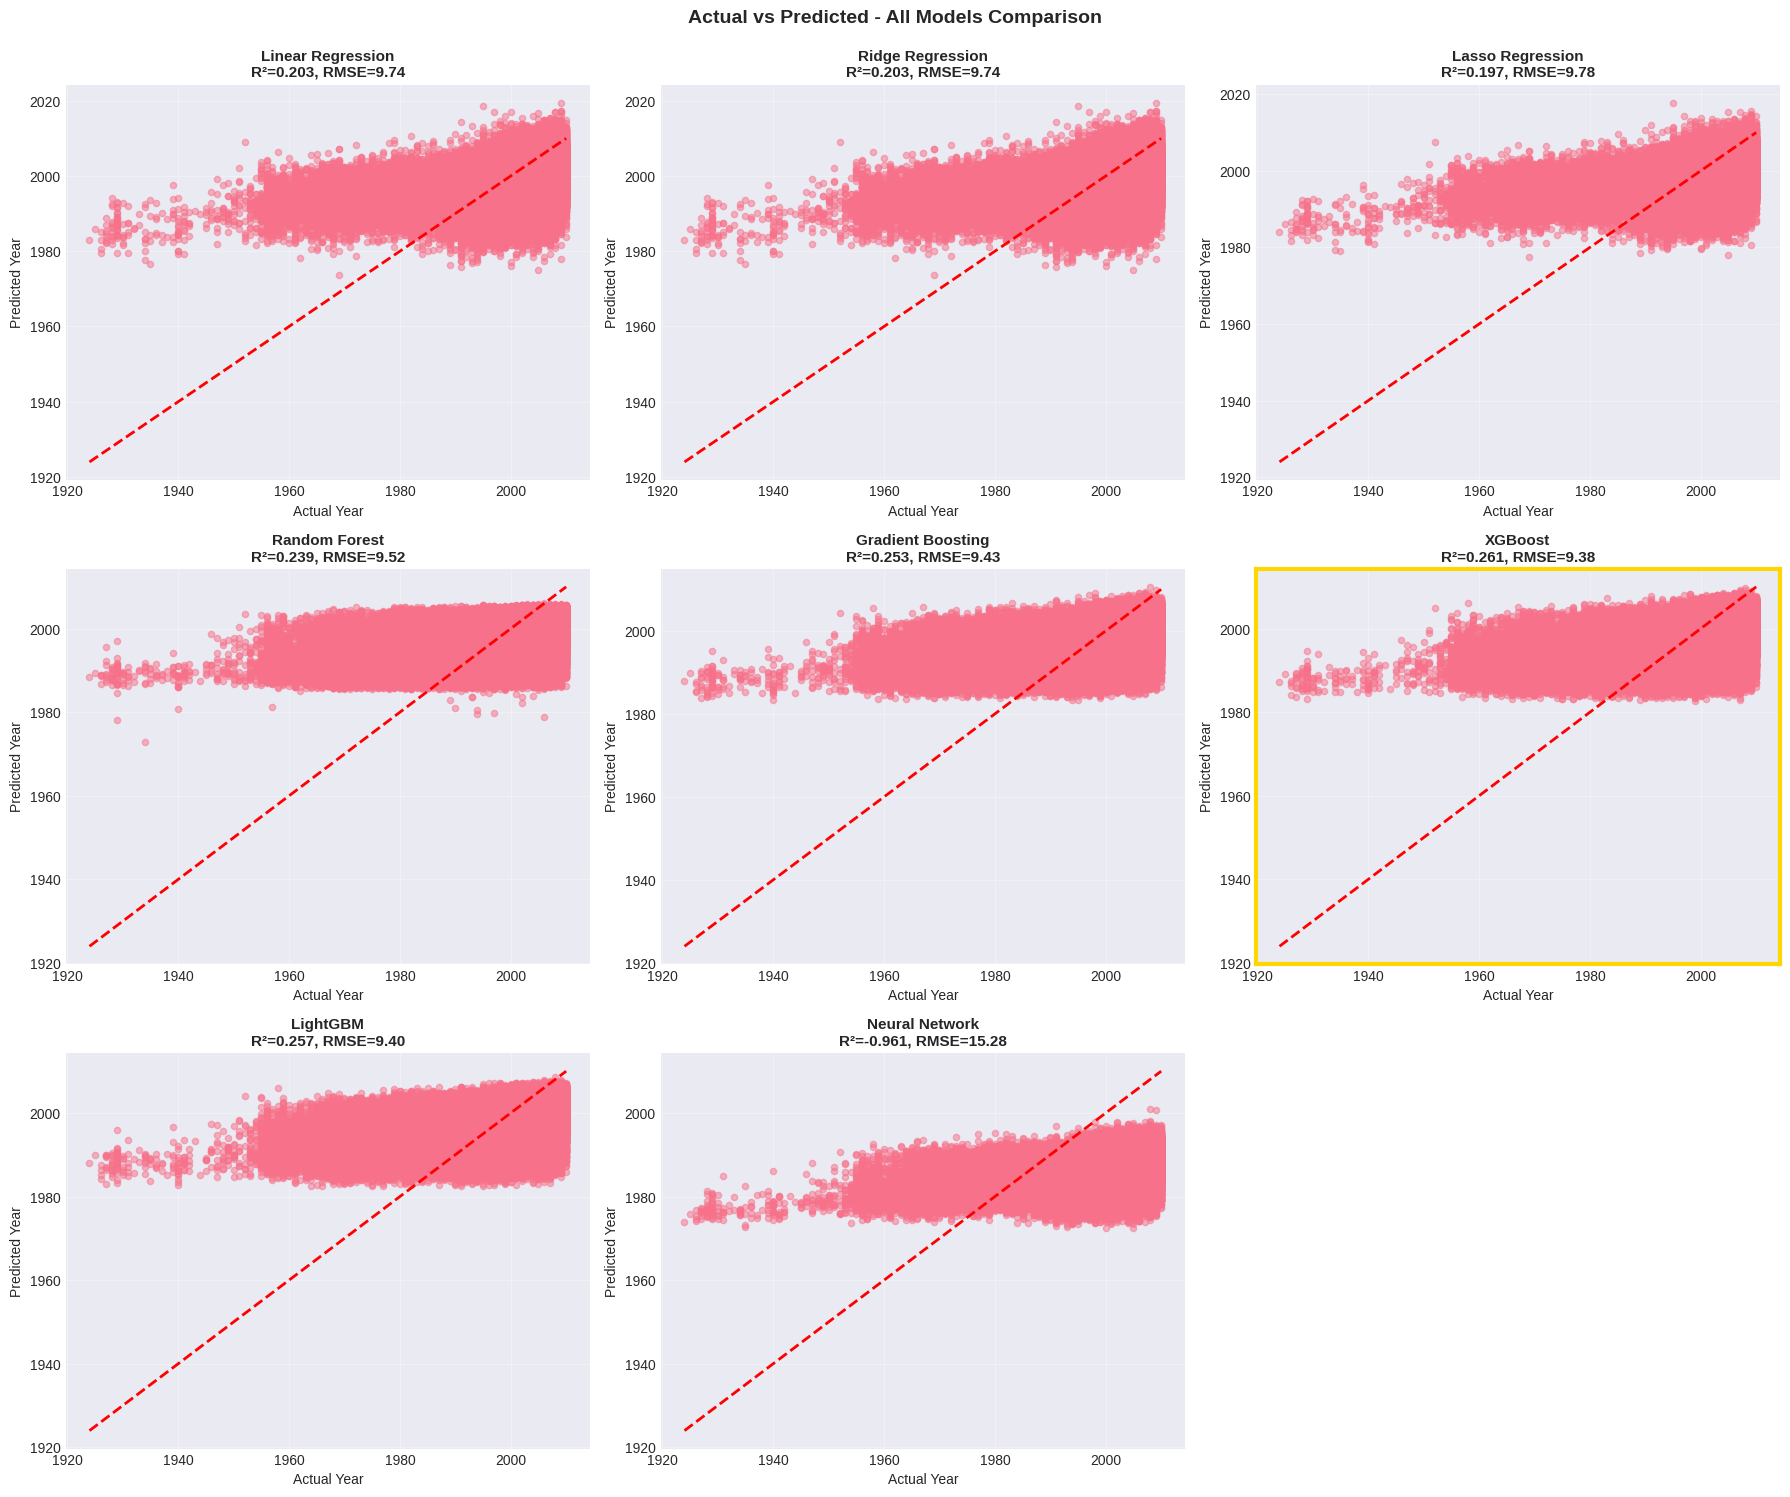


✓ All models prediction comparison visualized!


In [ ]:
print("\n" + "="*60)
print("ALL MODELS PREDICTION COMPARISON")
print("="*60)

n_models = len(all_results)
n_cols = 3
n_rows = (n_models + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten()

for idx, result in enumerate(all_results):
    y_pred = result['y_test_pred']
    model_name = result['model_name']
    test_r2 = result['test_r2']
    test_rmse = result['test_rmse']

    axes[idx].scatter(y_test, y_pred, alpha=0.5, s=20)
    axes[idx].plot([y_test.min(), y_test.max()],
                   [y_test.min(), y_test.max()],
                   'r--', lw=2)
    axes[idx].set_xlabel('Actual Year', fontsize=10)
    axes[idx].set_ylabel('Predicted Year', fontsize=10)
    axes[idx].set_title(f'{model_name}\nR²={test_r2:.3f}, RMSE={test_rmse:.2f}',
                       fontsize=11, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

    if idx == best_idx:
        for spine in axes[idx].spines.values():
            spine.set_edgecolor('gold')
            spine.set_linewidth(3)

for idx in range(n_models, len(axes)):
    axes[idx].axis('off')

plt.suptitle('Actual vs Predicted - All Models Comparison',
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\n✓ All models prediction comparison visualized!")

Error Distribution Analysis


ERROR DISTRIBUTION ANALYSIS


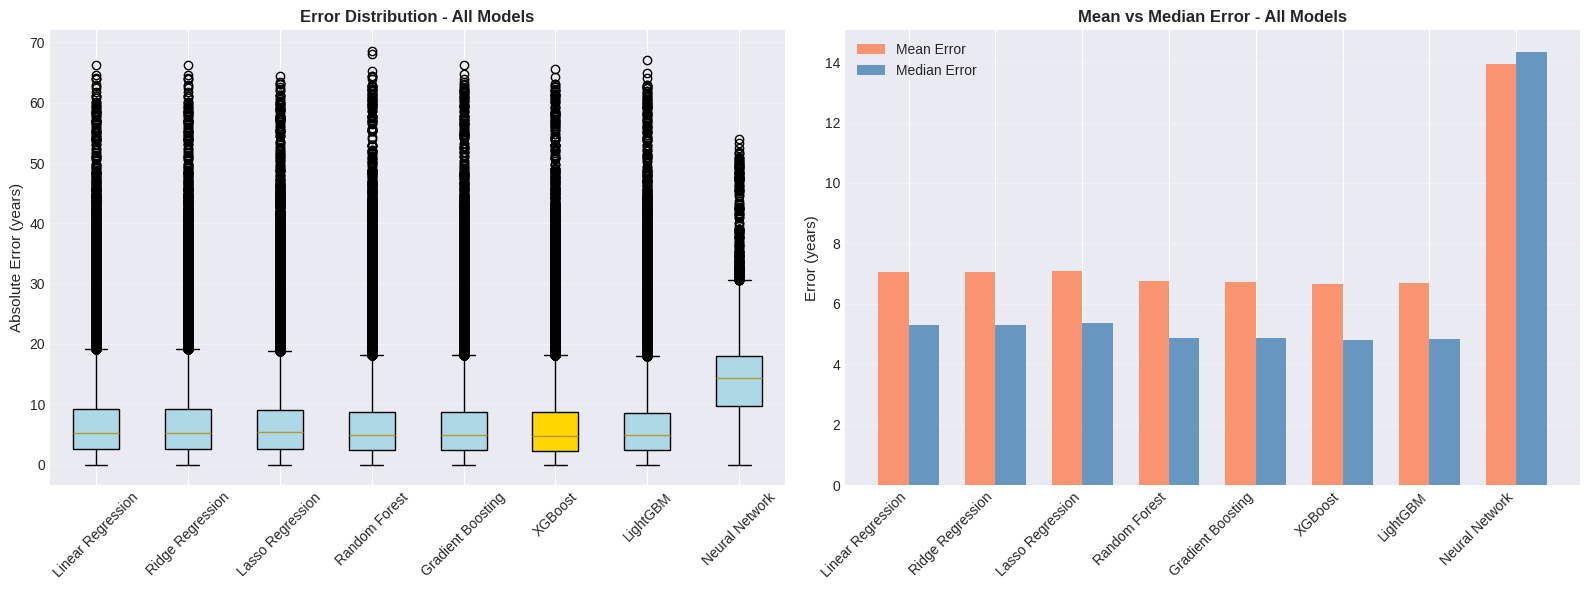


Error Statistics for All Models:
Model                Mean Error   Median Error   Std Error   
Linear Regression    7.0691       5.3157         6.6979      
Ridge Regression     7.0691       5.3157         6.6979      
Lasso Regression     7.0919       5.3627         6.7283      
Random Forest        6.7715       4.8689         6.6854      
Gradient Boosting    6.7226       4.8679         6.6096      
XGBoost              6.6729       4.8052         6.5866      
LightGBM             6.6965       4.8384         6.5979      
Neural Network       13.9421      14.3325        6.2459      

✓ Error distribution analysis completed!


In [ ]:
print("\n" + "="*60)
print("ERROR DISTRIBUTION ANALYSIS")
print("="*60)

error_data = []
for result in all_results:
    y_pred = result['y_test_pred']
    errors = np.abs(y_test - y_pred)
    error_data.append({
        'model': result['model_name'],
        'errors': errors,
        'mean_error': errors.mean(),
        'median_error': np.median(errors),
        'std_error': errors.std()
    })

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

positions = range(len(error_data))
box_data = [ed['errors'] for ed in error_data]
labels = [ed['model'] for ed in error_data]

bp = axes[0].boxplot(box_data, labels=labels, patch_artist=True)
for patch, idx in zip(bp['boxes'], positions):
    if idx == best_idx:
        patch.set_facecolor('gold')
    else:
        patch.set_facecolor('lightblue')
axes[0].set_ylabel('Absolute Error (years)', fontsize=11)
axes[0].set_title('Error Distribution - All Models', fontsize=12, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

model_names = [ed['model'] for ed in error_data]
mean_errors = [ed['mean_error'] for ed in error_data]
median_errors = [ed['median_error'] for ed in error_data]

x = np.arange(len(model_names))
width = 0.35

axes[1].bar(x - width/2, mean_errors, width, label='Mean Error', color='coral', alpha=0.8)
axes[1].bar(x + width/2, median_errors, width, label='Median Error', color='steelblue', alpha=0.8)
axes[1].set_ylabel('Error (years)', fontsize=11)
axes[1].set_title('Mean vs Median Error - All Models', fontsize=12, fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(model_names, rotation=45, ha='right')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nError Statistics for All Models:")
print(f"{'Model':<20} {'Mean Error':<12} {'Median Error':<14} {'Std Error':<12}")
print("="*60)
for ed in error_data:
    print(f"{ed['model']:<20} {ed['mean_error']:<12.4f} {ed['median_error']:<14.4f} {ed['std_error']:<12.4f}")

print("\n✓ Error distribution analysis completed!")

Prediction Confidence Analysis


PREDICTION CONFIDENCE ANALYSIS


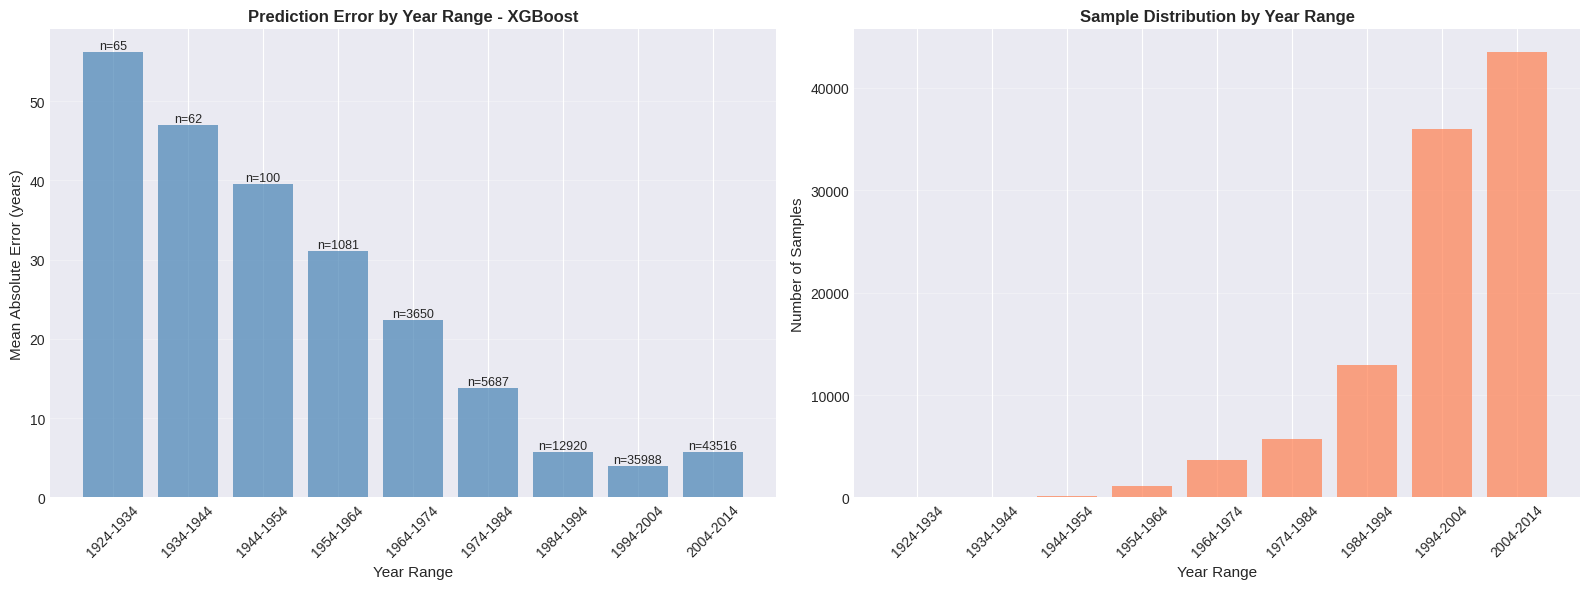


Prediction Metrics by Year Range:
Year Range      Count    MAE        RMSE       Std       
1924-1934       65       56.2503    56.4764    5.0483    
1934-1944       62       46.9840    47.3389    5.7853    
1944-1954       100      39.5133    39.7653    4.4695    
1954-1964       1081     31.0353    31.4979    5.3782    
1964-1974       3650     22.3884    23.0920    5.6569    
1974-1984       5687     13.8585    14.9831    5.7209    
1984-1994       12920    5.7278     7.1003     5.5658    
1994-2004       35988    3.9458     5.1179     5.0794    
2004-2014       43516    5.7275     7.2183     4.5813    

✓ Prediction confidence analysis completed!


In [ ]:
print("\n" + "="*60)
print("PREDICTION CONFIDENCE ANALYSIS")
print("="*60)

y_test_array = y_test.values
residuals_best = y_test_array - y_test_pred_best

year_bins = np.arange(y_test_array.min(), y_test_array.max() + 10, 10)
year_labels = [f"{int(year_bins[i])}-{int(year_bins[i+1])}"
               for i in range(len(year_bins)-1)]

year_indices = np.digitize(y_test_array, year_bins) - 1

bin_metrics = []
for i in range(len(year_bins)-1):
    mask = year_indices == i
    if mask.sum() > 0:
        bin_residuals = residuals_best[mask]
        bin_metrics.append({
            'range': year_labels[i],
            'count': mask.sum(),
            'mae': np.abs(bin_residuals).mean(),
            'rmse': np.sqrt((bin_residuals**2).mean()),
            'std': bin_residuals.std()
        })

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

ranges = [m['range'] for m in bin_metrics]
maes = [m['mae'] for m in bin_metrics]
counts = [m['count'] for m in bin_metrics]

axes[0].bar(ranges, maes, color='steelblue', alpha=0.7)
axes[0].set_xlabel('Year Range', fontsize=11)
axes[0].set_ylabel('Mean Absolute Error (years)', fontsize=11)
axes[0].set_title(f'Prediction Error by Year Range - {best_model_name}',
                  fontsize=12, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

for i, (mae, count) in enumerate(zip(maes, counts)):
    axes[0].text(i, mae, f'n={count}', ha='center', va='bottom', fontsize=9)

axes[1].bar(ranges, counts, color='coral', alpha=0.7)
axes[1].set_xlabel('Year Range', fontsize=11)
axes[1].set_ylabel('Number of Samples', fontsize=11)
axes[1].set_title('Sample Distribution by Year Range', fontsize=12, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nPrediction Metrics by Year Range:")
print(f"{'Year Range':<15} {'Count':<8} {'MAE':<10} {'RMSE':<10} {'Std':<10}")
print("="*60)
for m in bin_metrics:
    print(f"{m['range']:<15} {m['count']:<8} {m['mae']:<10.4f} {m['rmse']:<10.4f} {m['std']:<10.4f}")

print("\n✓ Prediction confidence analysis completed!")

Summary and Insights

In [ ]:
print("\n" + "="*80)
print("FINAL SUMMARY AND INSIGHTS")
print("="*80)

print(f"\n{'='*80}")
print("1. DATASET INFORMATION")
print(f"{'='*80}")
print(f"   Total samples:           {len(df)}")
print(f"   Total features:          {df.shape[1] - 1}")
print(f"   Selected features:       {len(selected_features)}")
print(f"   Target variable:         Year (song release year)")
print(f"   Year range:              {y.min():.0f} - {y.max():.0f}")
print(f"   Training samples:        {len(y_train)} ({len(y_train)/len(y)*100:.1f}%)")
print(f"   Test samples:            {len(y_test)} ({len(y_test)/len(y)*100:.1f}%)")

print(f"\n{'='*80}")
print("2. MODELS EVALUATED")
print(f"{'='*80}")
for i, result in enumerate(all_results, 1):
    print(f"   {i}. {result['model_name']}")

print(f"\n{'='*80}")
print(f"3. BEST MODEL: {best_model_name}")
print(f"{'='*80}")
print(f"   Test R² Score:           {tuned_r2:.4f}")
print(f"   Test RMSE:               {tuned_rmse:.4f} years")
print(f"   Test MAE:                {tuned_mae:.4f} years")
print(f"   ")
print(f"   Interpretation:")
print(f"   - The model explains {tuned_r2*100:.2f}% of the variance in song release years")
print(f"   - On average, predictions are off by {tuned_mae:.2f} years")
print(f"   - Root mean squared error is {tuned_rmse:.2f} years")

if tuned_r2 > 0.8:
    performance_rating = "Excellent ⭐⭐⭐⭐⭐"
elif tuned_r2 > 0.7:
    performance_rating = "Very Good ⭐⭐⭐⭐"
elif tuned_r2 > 0.6:
    performance_rating = "Good ⭐⭐⭐"
elif tuned_r2 > 0.5:
    performance_rating = "Moderate ⭐⭐"
else:
    performance_rating = "Needs Improvement ⭐"

print(f"   - Performance Rating:    {performance_rating}")

print(f"\n{'='*80}")
print("4. MODEL PERFORMANCE RANKING (by Test R²)")
print(f"{'='*80}")
ranked = comparison_df.sort_values('Test R²', ascending=False).reset_index(drop=True)
for i, row in ranked.iterrows():
    medal = "🥇" if i == 0 else "🥈" if i == 1 else "🥉" if i == 2 else "  "
    print(f"   {medal} {i+1}. {row['Model']:<20} | R²: {row['Test R²']:.4f} | "
          f"RMSE: {row['Test RMSE']:.2f} | MAE: {row['Test MAE']:.2f}")

print(f"\n{'='*80}")
print("5. KEY TECHNIQUES APPLIED")
print(f"{'='*80}")
print(f"   ✓ Data Exploration & Visualization")
print(f"   ✓ Outlier Detection & Handling (IQR method with capping)")
print(f"   ✓ Feature Selection (SelectKBest with f_regression)")
print(f"   ✓ Feature Scaling (RobustScaler)")
print(f"   ✓ Train-Test Split (80-20)")
print(f"   ✓ Multiple ML Algorithms (Linear, Ridge, Lasso, RF, GB, XGB, LGBM)")
print(f"   ✓ Deep Learning (Neural Network with Batch Normalization & Dropout)")
print(f"   ✓ Cross-Validation (3-fold)")
print(f"   ✓ Hyperparameter Tuning (GridSearchCV)")
print(f"   ✓ Comprehensive Evaluation (MSE, RMSE, MAE, R²)")
print(f"   ✓ Residual Analysis & Q-Q Plot")
print(f"   ✓ Feature Importance Analysis")

print(f"\n{'='*80}")
print("6. KEY FINDINGS & INSIGHTS")
print(f"{'='*80}")

best_model_data = ranked.iloc[0]
worst_model_data = ranked.iloc[-1]
improvement = ((best_model_data['Test R²'] - worst_model_data['Test R²']) /
               worst_model_data['Test R²'] * 100)

print(f"   • Best performing model is {best_model_data['Model']}")
print(f"   • {best_model_data['Model']} outperforms {worst_model_data['Model']} "
      f"by {improvement:.1f}% in R²")
print(f"   • Average prediction error ranges from {ranked['Test MAE'].min():.2f} "
      f"to {ranked['Test MAE'].max():.2f} years")

train_test_gap = best_model_data['Train R²'] - best_model_data['Test R²']
if train_test_gap > 0.1:
    print(f"   ⚠ Warning: Potential overfitting detected (Train-Test R² gap: {train_test_gap:.4f})")
else:
    print(f"   ✓ Model shows good generalization (Train-Test R² gap: {train_test_gap:.4f})")

print(f"\n{'='*80}")
print("7. MEMORY OPTIMIZATION")
print(f"{'='*80}")
print(f"   • Original dataset memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"   • Feature selection reduced features from {df.shape[1]-1} to {len(selected_features)}")
print(f"   • Used memory-efficient model parameters")
print(f"   • Optimized for systems with < 10GB RAM")

print(f"\n{'='*80}")
print("✅ END-TO-END REGRESSION PIPELINE COMPLETED SUCCESSFULLY!")
print(f"{'='*80}\n")


FINAL SUMMARY AND INSIGHTS

1. DATASET INFORMATION
   Total samples:           515345
   Total features:          90
   Selected features:       50
   Target variable:         Year (song release year)
   Year range:              1922 - 2011
   Training samples:        412276 (80.0%)
   Test samples:            103069 (20.0%)

2. MODELS EVALUATED
   1. Linear Regression
   2. Ridge Regression
   3. Lasso Regression
   4. Random Forest
   5. Gradient Boosting
   6. XGBoost
   7. LightGBM
   8. Neural Network

3. BEST MODEL: XGBoost
   Test R² Score:           0.2939
   Test RMSE:               9.1670 years
   Test MAE:                6.4990 years
   
   Interpretation:
   - The model explains 29.39% of the variance in song release years
   - On average, predictions are off by 6.50 years
   - Root mean squared error is 9.17 years
   - Performance Rating:    Needs Improvement ⭐

4. MODEL PERFORMANCE RANKING (by Test R²)
   🥇 1. XGBoost              | R²: 0.2614 | RMSE: 9.38 | MAE: 6.67
  

Export Results and Model

In [ ]:
print("\n" + "="*60)
print("EXPORT RESULTS AND MODEL")
print("="*60)

comparison_df.to_csv('model_comparison_results.csv', index=False)
print("✓ Model comparison saved to 'model_comparison_results.csv'")

predictions_df = pd.DataFrame({
    'Actual_Year': y_test.values,
    'Predicted_Year': y_test_pred_best,
    'Residual': y_test.values - y_test_pred_best,
    'Absolute_Error': np.abs(y_test.values - y_test_pred_best)
})
predictions_df.to_csv('best_model_predictions.csv', index=False)
print("✓ Predictions saved to 'best_model_predictions.csv'")

if best_model_name in tree_based_models and hasattr(best_model_final, 'feature_importances_'):
    feature_imp_df.to_csv('feature_importance.csv', index=False)
    print("✓ Feature importance saved to 'feature_importance.csv'")

import joblib

if best_model_name != 'Neural Network':
    joblib.dump(best_model_final, 'best_model.pkl')
    joblib.dump(scaler, 'scaler.pkl')
    joblib.dump(selector, 'feature_selector.pkl')
    print(f"✓ Best model ({best_model_name}) saved to 'best_model.pkl'")
    print("✓ Scaler saved to 'scaler.pkl'")
    print("✓ Feature selector saved to 'feature_selector.pkl'")
else:
    best_model_final.save('best_model_nn.h5')
    joblib.dump(scaler, 'scaler.pkl')
    joblib.dump(selector, 'feature_selector.pkl')
    print(f"✓ Neural Network saved to 'best_model_nn.h5'")
    print("✓ Scaler saved to 'scaler.pkl'")
    print("✓ Feature selector saved to 'feature_selector.pkl'")

with open('model_summary_report.txt', 'w') as f:
    f.write("="*80 + "\n")
    f.write("SONG YEAR PREDICTION - MODEL SUMMARY REPORT\n")
    f.write("="*80 + "\n\n")

    f.write("DATASET INFORMATION\n")
    f.write("-"*80 + "\n")
    f.write(f"Total Samples: {len(df)}\n")
    f.write(f"Total Features: {df.shape[1] - 1}\n")
    f.write(f"Selected Features: {len(selected_features)}\n")
    f.write(f"Year Range: {y.min():.0f} - {y.max():.0f}\n\n")

    f.write("BEST MODEL\n")
    f.write("-"*80 + "\n")
    f.write(f"Model Name: {best_model_name}\n")
    f.write(f"Test R² Score: {tuned_r2:.4f}\n")
    f.write(f"Test RMSE: {tuned_rmse:.4f} years\n")
    f.write(f"Test MAE: {tuned_mae:.4f} years\n\n")

    f.write("ALL MODELS RANKING\n")
    f.write("-"*80 + "\n")
    for i, row in ranked.iterrows():
        f.write(f"{i+1}. {row['Model']:<20} | R²: {row['Test R²']:.4f} | "
                f"RMSE: {row['Test RMSE']:.2f} | MAE: {row['Test MAE']:.2f}\n")

    f.write("\n" + "="*80 + "\n")
    f.write("Report generated successfully!\n")
    f.write("="*80 + "\n")

print("✓ Summary report saved to 'model_summary_report.txt'")

print("\n" + "="*60)
print("ALL RESULTS EXPORTED SUCCESSFULLY!")
print("="*60)
print("\nFiles created:")
print("  1. model_comparison_results.csv")
print("  2. best_model_predictions.csv")
print("  3. feature_importance.csv (if applicable)")
print("  4. best_model.pkl or best_model_nn.h5")
print("  5. scaler.pkl")
print("  6. feature_selector.pkl")
print("  7. model_summary_report.txt")


EXPORT RESULTS AND MODEL
✓ Model comparison saved to 'model_comparison_results.csv'
✓ Predictions saved to 'best_model_predictions.csv'
✓ Feature importance saved to 'feature_importance.csv'
✓ Best model (XGBoost) saved to 'best_model.pkl'
✓ Scaler saved to 'scaler.pkl'
✓ Feature selector saved to 'feature_selector.pkl'
✓ Summary report saved to 'model_summary_report.txt'

ALL RESULTS EXPORTED SUCCESSFULLY!

Files created:
  1. model_comparison_results.csv
  2. best_model_predictions.csv
  3. feature_importance.csv (if applicable)
  4. best_model.pkl or best_model_nn.h5
  5. scaler.pkl
  6. feature_selector.pkl
  7. model_summary_report.txt
